<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
keras.layers.Layer.weights
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.signal import convolve2d

In [76]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_labels = list(set(y_train))
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

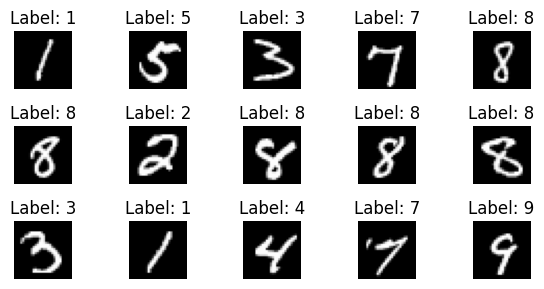

In [77]:
num_row, num_col = 3, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,))
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(6, 3))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap=plt.cm.gray)
    ax.axis('off')
plt.tight_layout()
plt.show()

Ref: https://cs231n.github.io/convolutional-networks/ for number of padding/dimension

In [78]:
num_filter = [2, 1]
iter = 10000
bias = np.random.normal(loc=0.0, scale=1.0, size=len(num_filter))

mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter[0],
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[0]),
                     activation="sigmoid",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.add(Conv2D(filters = num_filter[1],
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[1]),
                     activation ='sigmoid'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # strides = (1,1)
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# CNN

In [79]:
mnist_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 2)           │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 27, 27, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 1)           │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 169)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,729 (6.75 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
mnist_cnn_fit = mnist_cnn.fit(x_train, label_train, epochs = 60, batch_size = 250)

Epoch 1/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.0964 - loss: 2.3134
Epoch 2/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.1110 - loss: 2.3029
Epoch 3/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.1098 - loss: 2.3021
Epoch 4/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.1116 - loss: 2.3014
Epoch 5/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.1137 - loss: 2.3007
Epoch 6/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.1112 - loss: 2.3008
Epoch 7/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.1107 - loss: 2.3004
Epoch 8/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - accuracy: 0.1132 - loss: 2.2998
Epoch 9/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.1119 - loss: 2.2991
Epoch 10/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.1114 - loss: 2.2985
Epoch 11/60
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.1125 - loss: 2.2979
Epoch 12/60
240/240 

In [81]:
layer_names = [layer.name for layer in mnist_cnn.layers]
layer_names

['conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'flatten_1',
 'dense_1']

In [82]:
conv1_W, conv1_b = mnist_cnn.layers[layer_names.index('conv2d_2')].get_weights()
conv2_W, conv2_b = mnist_cnn.layers[layer_names.index('conv2d_3')].get_weights()
dense_W, dense_b = mnist_cnn.layers[layer_names.index('dense_1')].get_weights()

In [83]:
def same_padding(images, filter_h, filter_w, stride):
    sample_size, img_h, img_w, _ = images.shape
    stride_h, stride_w = stride

    pad_h = ((stride_h-1)*img_h + filter_h - stride_h) // 2
    pad_w = ((stride_w-1)*img_w + filter_w - stride_w) // 2

    output = []
    for n in range(sample_size):
      padded_img = np.pad(images[n,:,:,:], ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode='constant', constant_values=0)
      output.append(padded_img)

    return np.array(output)

In [84]:
def get_start_index(output_height, output_width, stride_height, stride_width, kernel_height, kernel_width):
    h_start, h_end, w_start, w_end = [], [], [], []
    i, j = 0, 0

    while i <= output_height and j <= output_width:
        h_start_value = i*stride_height
        h_end_value = h_start_value + kernel_height
        w_start_value = j*stride_width
        w_end_value = w_start_value + kernel_width
        if h_end_value <= output_height or w_end_value <= output_width:
           h_start.append(h_start_value)
           #h_end.append(h_end_value)
           w_start.append(w_start_value)
           #w_end.append(w_end_value)
        i+=1
        j+=1
    return h_start, w_start

In [85]:
def reLU(images):
  return np.maximum(0, images)

def sigmoid(images):
	return 1.0 / (1.0 + np.exp(-images))

def softmax(images):
  sample_size, num_classes = images.shape
  max_idx = []

  for n in range(sample_size):
    exp_x = np.exp(images[n] - np.max(images[n]))
    p = exp_x/exp_x.sum()
    max_idx.append(np.argmax(p))
  return np.array(max_idx)

In [86]:
def Convo2D(images, filters, stride, bias, padding):
    filter_h, filter_w, in_channels, out_channels = filters.shape

    if padding:
      img_padded = same_padding(images, filter_h, filter_w, stride)
    else:
      img_padded = images

    sample_size, input_h, input_w, channels = img_padded.shape
    stride_h, stride_w = stride
    output_h = input_h - filter_h + 1
    output_w = input_w - filter_w + 1
    convo_img = np.empty((sample_size, output_h, output_w, out_channels))

    for i in range(output_w):
        for j in range(output_h):
            h_start_idx = i*stride_h
            w_start_idx = j*stride_w
            sub_img = img_padded[:, h_start_idx:(h_start_idx+filter_h), w_start_idx:(w_start_idx+filter_w)]

            for f in range(out_channels):
                res = np.sum(sub_img * filters[:,:,:, f], axis=(1, 2, 3)) + bias[f]
                convo_img[:, i, j, f] = res

    return sigmoid(convo_img)

In [87]:
def max_pooling(images, pool_size, stride):
    sample_size, input_h, input_w, channels = images.shape
    kernel_h, kernel_w = pool_size
    stride_h, stride_w = stride

    output_w = (input_w - kernel_w) // stride_w + 1
    output_h = (input_h - kernel_h) // stride_h + 1
    pooled_img = np.empty((sample_size, output_h, output_w, channels))

    for n in range(sample_size):
        sub_img = images[n]
        for c in range(channels):
          for i in range(output_h):
            for j in range(output_w):
                h_start_idx = i*stride_h
                w_start_idx = j*stride_w
                subsection = sub_img[h_start_idx:(h_start_idx+kernel_h), w_start_idx:(w_start_idx+kernel_w), c]
                pooled_img[n, i, j, c] = np.max(subsection)

    return pooled_img

In [88]:
def dense_layer(images, weights, bias):
  sample_size = images.shape[0]
  img_flattened = images.reshape(sample_size, -1)
  output = np.dot(img_flattened, weights) + bias
  return output

In [89]:
convo1_out = Convo2D(x_test, filters=conv1_W, stride=(1,1), bias = conv1_b, padding=True)
convo1_maxpool = max_pooling(convo1_out, pool_size=(2,2), stride=(1,1))
convo2_out = Convo2D(convo1_maxpool, filters=conv2_W, stride=(1,1), bias = conv2_b, padding=True)
convo2_maxpool = max_pooling(convo2_out, pool_size=(2,2), stride=(2,2))
dense_out = dense_layer(convo2_maxpool, weights=dense_W, bias=dense_b)
pred_classes = softmax(dense_out)

In [90]:
np.mean(pred_classes == y_test)

0.8913

In [91]:
def plot_images(data, predicted_labels, nrows=0, images_per_row=0, wspace=0.3, hspace=0.3):
    fig, axes = plt.subplots(nrows, images_per_row, figsize=(7, 4))
    axes = axes.ravel()

    for idx in range(nrows * images_per_row):
        ax = axes[idx]
        image = data[idx]
        ax.imshow(image, cmap=plt.cm.gray)
        ax.set_title(f"Predicted {predicted_labels[idx]}")
        ax.axis('off')

    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.tight_layout()
    plt.show()

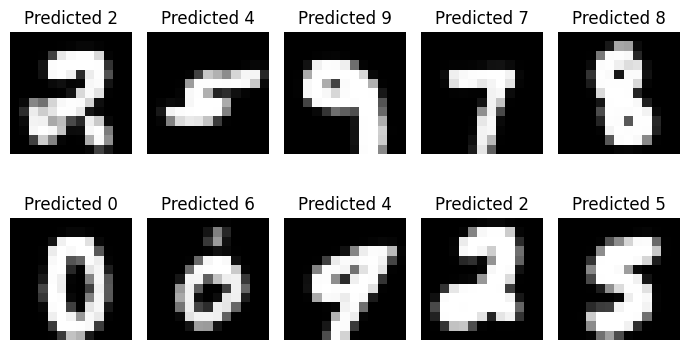

In [92]:
idx = np.random.randint(low=0, high=convo2_maxpool.shape[0], size=(10,))
x_cnn_sampled = convo2_maxpool[idx]
pred_label = pred_classes[idx]
plot_images(x_cnn_sampled, pred_label, 2, 5, wspace=100, hspace=10)

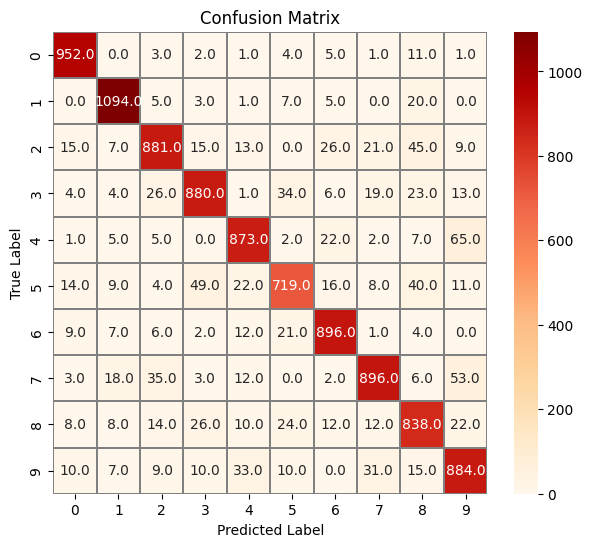

In [93]:
cm = confusion_matrix(y_test, pred_classes)
f,ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# TDA

In [94]:
!pip install gudhi
import gudhi as gd
from collections import defaultdict
from joblib import Parallel, delayed

In [95]:
cnn_img = convo2_maxpool.squeeze()
n = cnn_img.shape[0]

pers = []
for i in range(n):
    cubical_complex = gd.CubicalComplex(top_dimensional_cells=cnn_img[i])
    cubical_pers = cubical_complex.persistence()
    pers.append(cubical_pers)

In [96]:
first_indices = {}

for i, val in enumerate(y_test):
    if val not in first_indices:
        first_indices[val] = i

idx = np.array(list(first_indices.values()))

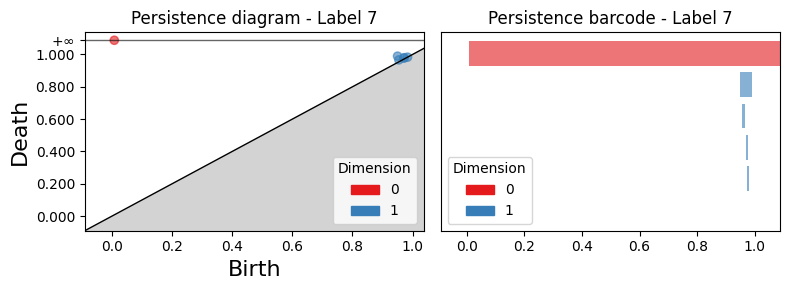

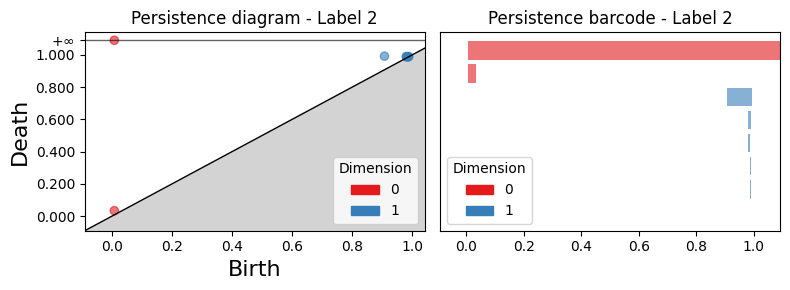

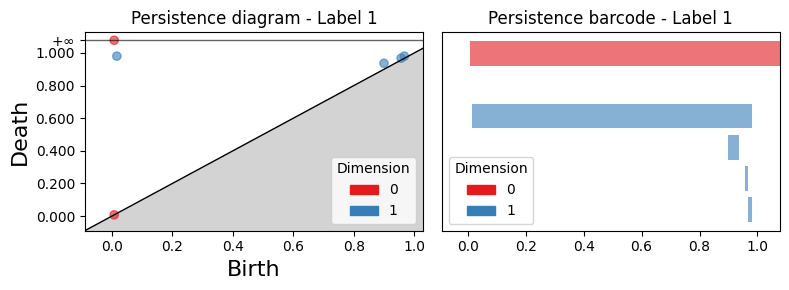

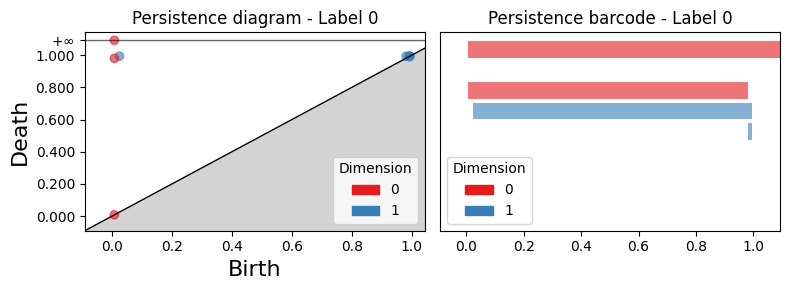

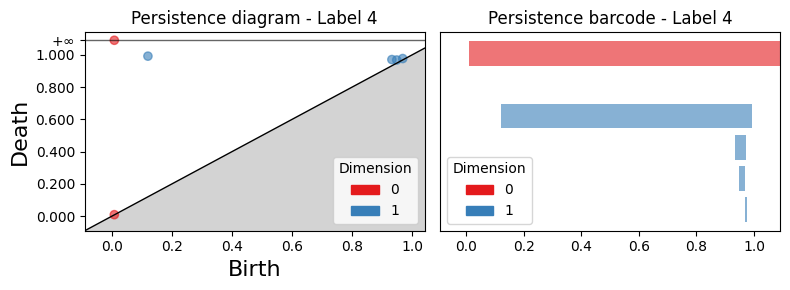

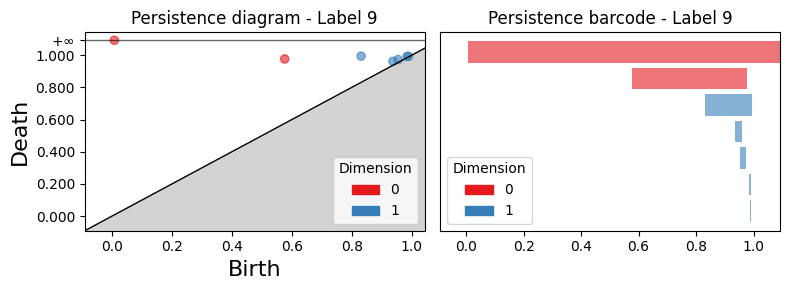

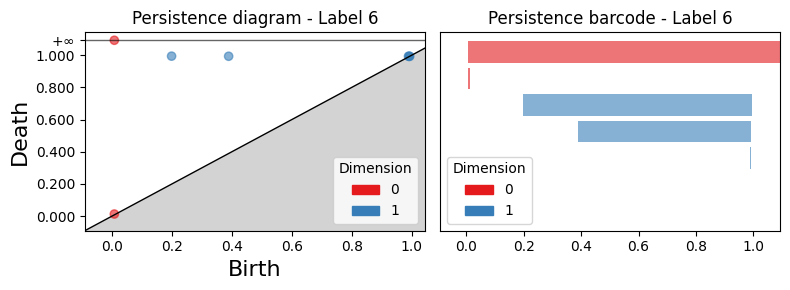

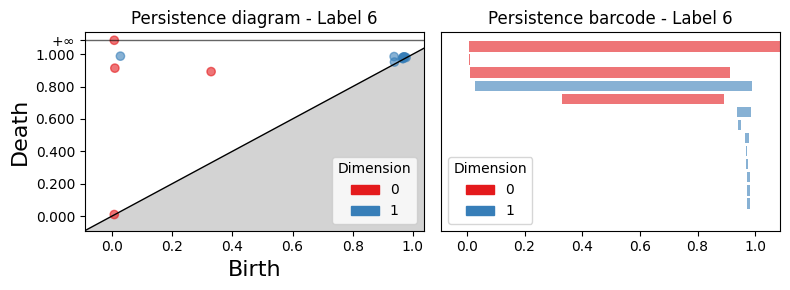

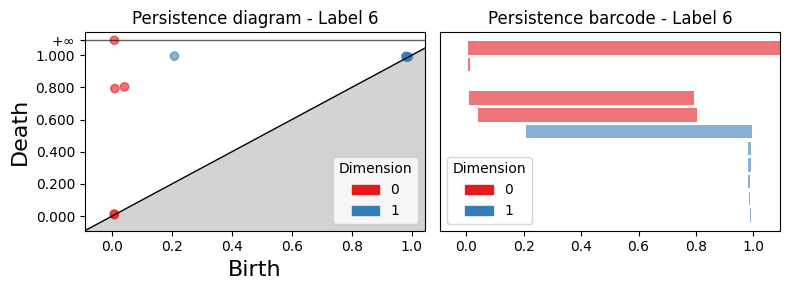

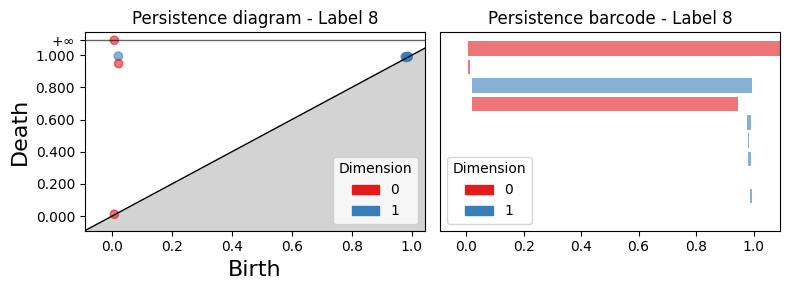

In [97]:
num_row, img_per_row = 10, 2
for i in range(num_row):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

    gd.plot_persistence_diagram(persistence=pers[idx[i]], axes=axes[0])
    axes[0].set_title(f'Persistence diagram - Label {pred_classes[idx[i]]}')

    gd.plot_persistence_barcode(persistence=pers[idx[i]], axes=axes[1])
    axes[1].set_title(f'Persistence barcode - Label {pred_classes[idx[i]]}')

    plt.tight_layout()
    plt.show()

In [98]:
def sort_and_group(labels, pers_data):
  grouped_pers_data = defaultdict(list)

  for y, d in zip(labels, pers_data):
    grouped_pers_data[y].append(d)

  sorted_grouped_pers_data = sorted(grouped_pers_data.items())

  sorted_labels = []
  sorted_pers_data = []

  for y_val, grouped_lists in sorted_grouped_pers_data:
      for sublist in grouped_lists:
          sorted_labels.append(y_val)
          sorted_pers_data.append(sublist)

  return np.array(sorted_labels), sorted_pers_data

sorted_y_test, sorted_pers = sort_and_group(y_test, pers)

In [99]:
unique_labels = np.unique(y_test)
selected_indices = []

for label in unique_labels:
    indices = np.where(sorted_y_test == label)[0]
    selected_indices.extend(indices[:20])

selected_indices = np.array(selected_indices, dtype=int)
selected_labels = sorted_y_test[selected_indices]

In [103]:
pers_subset = []
for i in range(len(selected_indices)):
  pers_subset.append(pers[selected_indices[i]])

l = len(pers_subset)
B0 = np.zeros((l, l))

barcode = []
for i in range(l):
    pers_data = pers_subset[i]
    barcode.append([(birth, death) for _, (birth, death) in pers_data])

In [104]:
for i in range(l):
    for j in range(i):
        B0[i,j] = gd.bottleneck_distance(barcode[i], barcode[j])

B0 = B0 + B0.transpose()

In [105]:
def plot_distance_matrix(matrix, title="Distance Matrix", labels=None):
    plt.figure(figsize=(8,6))
    if labels is not None:
        sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels, cmap="viridis")
    else:
        sns.heatmap(matrix, annot=True, fmt=".2f", cmap="viridis")
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Samples")
    plt.show()

In [107]:
B0

array([[0.        , 0.04170269, 0.4819914 , ..., 0.25313421, 0.33808735,
        0.1185466 ],
       [0.04170269, 0.        , 0.4819914 , ..., 0.25313421, 0.33808735,
        0.1185466 ],
       [0.4819914 , 0.4819914 , 0.        , ..., 0.46651955, 0.30110122,
        0.4819914 ],
       ...,
       [0.25313421, 0.25313421, 0.46651955, ..., 0.        , 0.33808735,
        0.18646663],
       [0.33808735, 0.33808735, 0.30110122, ..., 0.33808735, 0.        ,
        0.33808735],
       [0.1185466 , 0.1185466 , 0.4819914 , ..., 0.18646663, 0.33808735,
        0.        ]])

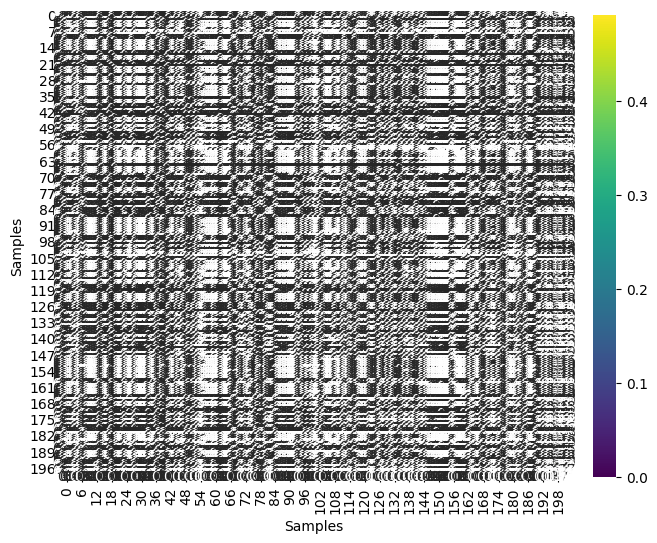

In [106]:
plot_distance_matrix(B0, title="")

In [ ]:
!pip install nibabel
import nibabel